Group Members
*   Barbadillo, Brent Justine
*   Delfin, Jyron Marc
*   Candelaria, Ernesto
*   Trillana, Mark Joseph
*   Gonzaga, Andrei

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Visitor_Logs.csv', encoding = 'latin1')
data1 = pd.read_csv('Inventory_Records.csv', encoding = 'latin1')
data2 = pd.read_csv('Email_Exchanges.csv', encoding ='latin -1')
data3 = pd.read_csv('Security_Camera_Logs.csv', encoding='latin1')

In [ ]:
statistics=data.describe()
statistics=data1.describe()
statistics=data2.describe()
statistics=data3.describe()

In [ ]:
group_data = data2.groupby(['From', 'Date']).size().reset_index(name='Counts')
pr = pd.DataFrame(data)
pr1 = pd.DataFrame(data1)
pr2 = pd.DataFrame(data2)
pr3 = pd.DataFrame(data3)

In [ ]:
pivo = group_data.pivot(index='Date', columns='From', values='Counts').fillna(0)

In [ ]:
data3['Timestamp'] = pd.to_datetime(data3['Timestamp'])
camera_movement_duration = data3[data3['Detected Movement'] == 'Yes'].groupby('Camera ID')['Timestamp'].diff().sum()
camera_movement_counts = data3.groupby('Camera ID')['Detected Movement'].value_counts().unstack().fillna(0)
most_active_camera = camera_movement_counts.sum(axis=1).idxmax()
print("Most active camera:", most_active_camera)

Most active camera: C101


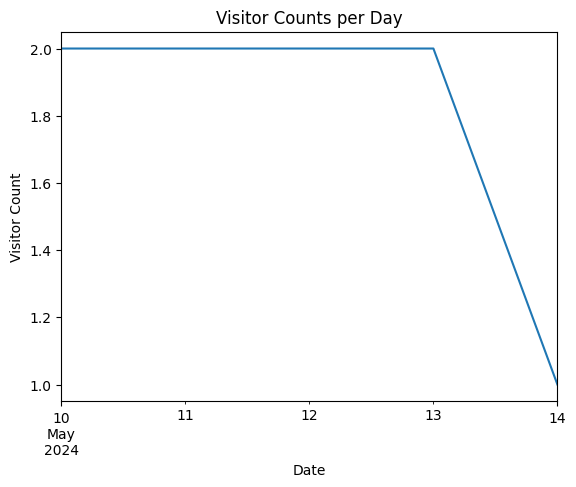

In [ ]:
pr['Date'] = pd.to_datetime(pr['Date'])
pr['Date'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Visitor Count')
plt.title('Visitor Counts per Day')
plt.show()

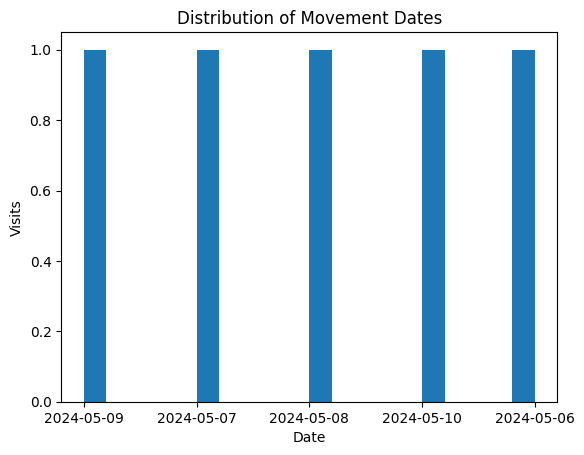

In [ ]:
plt.hist(pr1['Movement Date'], bins=20)
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title('Distribution of Movement Dates')
plt.show()

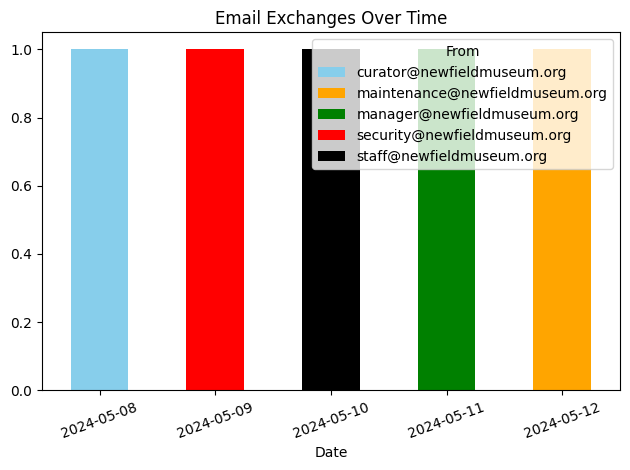

In [ ]:
pivo.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'green', 'red', 'black'])
plt.xlabel('Date')
plt.title('Email Exchanges Over Time')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

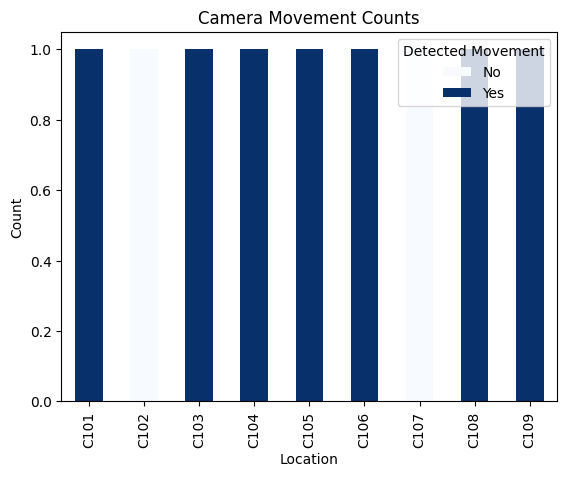

In [ ]:
plt.figure(figsize=(12, 8))
camera_movement_counts.plot(kind='bar', stacked=True, cmap='Blues')
plt.title("Camera Movement Counts")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title='Detected Movement', loc='upper right')
plt.show()